In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os

In [39]:
header = ['index', 'id', 'rate', 'generation_time', 'ingestion_time', 'commit_time']
# load the results from the 10 runs
for i in range(1, 11):
    files = glob.glob(f'experiment_1/results/{str(i)}/*.csv')
    df = pd.concat([pd.read_csv(f, names=header) for f in files])
    # normalize the timestamps by subtracting the minimum ingestion time
    start_time = df['generation_time'].min()
    df['generation_time'] -= start_time
    df['ingestion_time'] -= start_time
    df['commit_time'] -= start_time
    os.makedirs(f'./aggregated/experiment_1/{str(i)}', exist_ok=True)
    df.to_csv(f'./aggregated/experiment_1/{str(i)}/all.csv')

In [40]:
for i in range(1, 11):
    df = pd.read_csv(f'./aggregated/experiment_1/{str(i)}/all.csv')

    # group the data by id
    df = df.groupby('id').agg({'rate': 'min', 'generation_time': 'min', 'ingestion_time': 'mean', 'commit_time': 'max'})

    # add a column for the event time latency
    df['event_time_latency'] = df['commit_time'] - df['generation_time']

    # add a column for the processing time latency
    df['processing_time_latency'] = df['commit_time'] - df['ingestion_time']

    df.to_csv(f'./aggregated/experiment_1/{str(i)}/all.csv')

In [44]:
# load the results from the 10 runs into a single dataframe
df = pd.concat([pd.read_csv(f'./aggregated/experiment_1/{str(i)}/all.csv') for i in range(1, 11)])

df.to_csv('./experiment_1.csv')

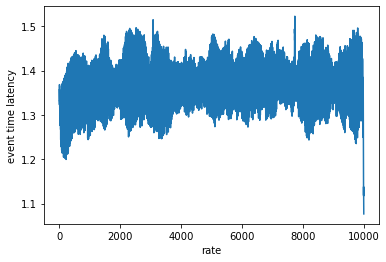

In [47]:
# remove rate lower that 10
df = df[(df['rate'] > 10)]
# group by rate and compute the average event time latency
df_grouped = df.groupby('rate')
# plot the event time latency against the rate
plt.plot(df_grouped['event_time_latency'].mean(), label='event time latency')
# plt.plot(df['rate'], df['event_time_latency'].rolling(10, min_periods=1).mean(), label='event time latency')
plt.xlabel('rate')
plt.ylabel('event time latency')
plt.show()

In [45]:
header = ['index', 'id', 'rate', 'state', 'generation_time', 'ingestion_time', 'commit_time']
# load the results from the 10 runs
for i in range(1, 11):
    files = glob.glob(f'experiment_2/results/{str(i)}/*.csv')
    df = pd.concat([pd.read_csv(f, names=header) for f in files])

    # normalize the timestamps by subtracting the minimum ingestion time
    start_time = df['generation_time'].min()
    df['generation_time'] -= start_time
    df['ingestion_time'] -= start_time
    df['commit_time'] -= start_time
    os.makedirs(f'./aggregated/experiment_2/{str(i)}', exist_ok=True)
    df.to_csv(f'./aggregated/experiment_2/{str(i)}/all.csv')


In [46]:
for i in range(1, 11):
    df = pd.read_csv(f'./aggregated/experiment_2/{str(i)}/all.csv')

    leader = df[df['state'] == 'leader']
    follower = df[df['state'] == 'follower']

    # group the data by id
    leader = leader.groupby('id').agg({'rate': 'min', 'generation_time': 'min', 'ingestion_time': 'mean', 'commit_time': 'max'})
    follower = follower.groupby('id').agg({'rate': 'min', 'generation_time': 'min', 'ingestion_time': 'mean', 'commit_time': 'max'})


    # add a column for the event time latency
    leader['event_time_latency'] = leader['commit_time'] - leader['generation_time']
    follower['event_time_latency'] = follower['commit_time'] - follower['generation_time']

    # add a column for the processing time latency
    leader['processing_time_latency'] = leader['commit_time'] - leader['ingestion_time']
    follower['processing_time_latency'] = follower['commit_time'] - follower['ingestion_time']

    leader['state'] = 'leader'
    follower['state'] = 'follower'

    df = pd.concat([leader, follower])

    df.to_csv(f'./aggregated/experiment_2/{str(i)}/all.csv')


In [47]:
# load the results from the 10 runs into a single dataframe
df = pd.concat([pd.read_csv(f'./aggregated/experiment_2/{str(i)}/all.csv') for i in range(1, 11)])

df.to_csv('./experiment_2.csv')

In [50]:
df = pd.read_csv('./experiment_2.csv', index_col=0)

/usr/local/anaconda3/lib/python3.8/site-packages/numpy/lib/arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


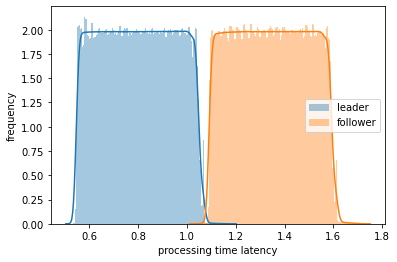

In [61]:
import seaborn as sns
import numpy as np

# create 100 bins between the minimum processing time latency and the maximum processing time latency
bins = np.linspace(df['processing_time_latency'].min(), df['processing_time_latency'].max(), 1000)

# make a distribution plot of the processing time latency
leader = df[df['state'] == 'leader']
follower = df[df['state'] == 'follower']
sns.distplot(leader['processing_time_latency'], label='leader', bins=bins)
sns.distplot(follower['processing_time_latency'], label='follower', bins=bins)
plt.legend()
plt.xlabel('processing time latency')
plt.ylabel('frequency')
plt.show()



In [62]:
df

,id,rate,generation_time,ingestion_time,commit_time,event_time_latency,processing_time_latency,state
0,0,1000,0.000000,0.006463,0.639120,0.639120,0.632657,leader
1,1,1000,0.009262,0.010903,0.639149,0.629887,0.628246,leader
2,2,1000,0.013145,0.014636,0.639160,0.626015,0.624525,leader
3,3,1000,0.016854,0.018267,0.639170,0.622316,0.620902,leader
4,4,1000,0.020479,0.021993,0.639179,0.618700,0.617186,leader
...,...,...,...,...,...,...,...,...
199971,99972,1000,364.516428,364.518047,365.569681,1.053253,1.051634,follower
199972,99973,1000,364.519958,364.521617,365.569689,1.049732,1.048073,follower
199973,99974,1000,364.523498,364.525139,365.569697,1.046199,1.044559,follower
199974,99975,1000,364.527087,364.528684,365.569705,1.042618,1.041021,follower
